**Adding Dependencies**

In [170]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from math import log
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr

**Using Dataset**

In [171]:
df = pd.read_csv('/content/insurance.csv')
print('Number of rows and columns in the data set: ',df.shape)
df.head()

Number of rows and columns in the data set:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Desribe the Dataset (Exploratory Data Analysis)** 

In [172]:
df_des = df.describe()
df_des

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


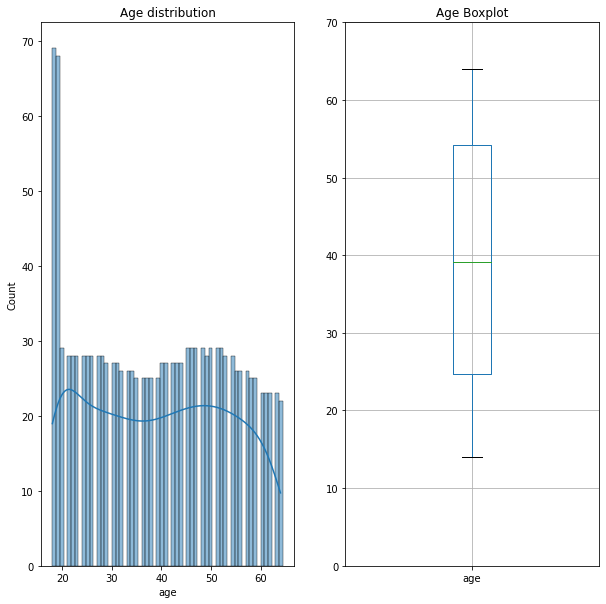

In [173]:
f = plt.figure(figsize=(10,10))

ax = f.add_subplot(121)
sns.histplot(df['age'],kde = True, binwidth=0.75)
ax.set_title('Age distribution')

ax = f.add_subplot(122)
bx = df_des.boxplot(column=['age'])
bx.set_title('Age Boxplot')
bx.set_ylim([0,70])

plt.show()

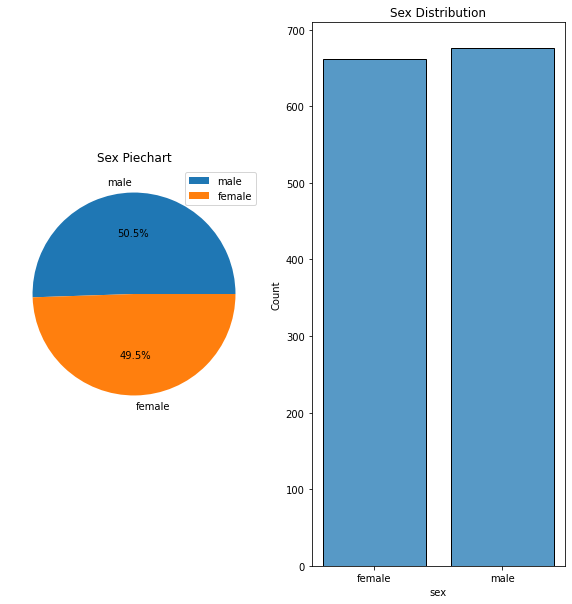

In [174]:
f = plt.figure(figsize=(10,10))

ax = f.add_subplot(121)
label_sex = ['male','female']
list_count = [df[df['sex']=='male']['sex'].shape[0],df[df['sex']=='female']['sex'].shape[0]]
plt.pie(list_count,labels=label_sex,autopct='%1.1f%%')
plt.legend()
ax.set_title('Sex Piechart')

ax = f.add_subplot(122)
sns.histplot(df['sex'],shrink=.8)
ax.set_title('Sex Distribution')

plt.show()

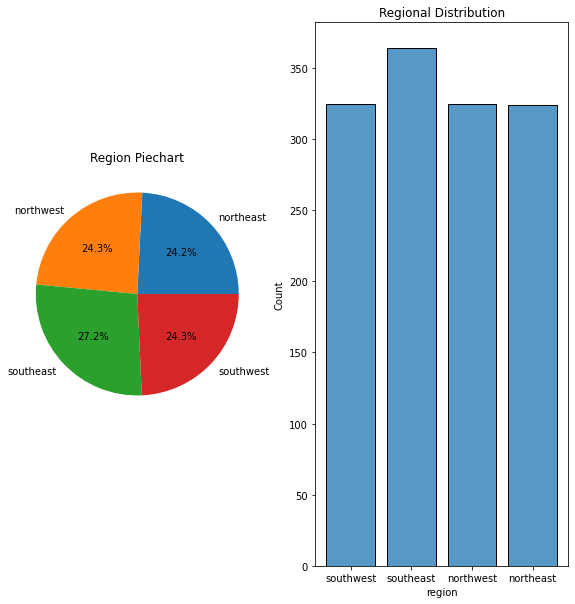

In [175]:
f = plt.figure(figsize=(10,10))

ax = f.add_subplot(121)
label_region = list(set(df['region']))
list_count_r = [df[df['region']==l]['region'].shape[0] for l in label_region]
plt.pie(list_count_r,labels=label_region,autopct='%1.1f%%')
ax.set_title('Region Piechart')

ax = f.add_subplot(122)
sns.histplot(df['region'],shrink=.8)
ax.set_title('Regional Distribution')

plt.show()

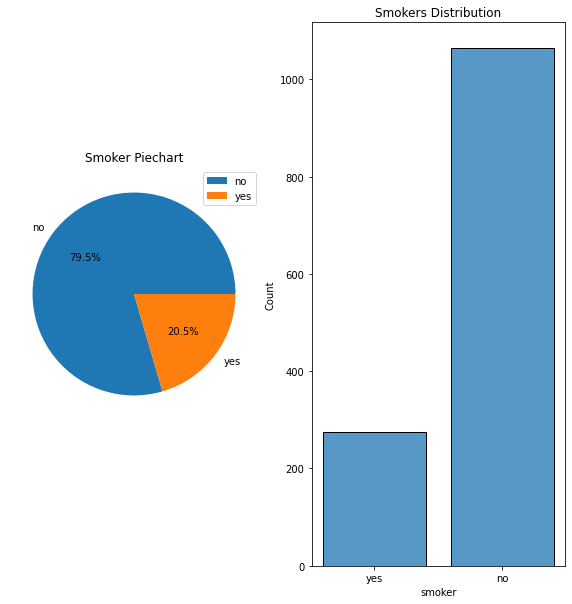

In [176]:
f = plt.figure(figsize=(10,10))

ax = f.add_subplot(121)
label_smoker = list(set(df['smoker']))
list_count_s = [df[df['smoker']==l]['smoker'].shape[0] for l in label_smoker]
plt.pie(list_count_s,labels=label_smoker,autopct='%1.1f%%')
plt.legend()
ax.set_title('Smoker Piechart')

ax = f.add_subplot(122)
sns.histplot(df['smoker'],shrink=.8)
ax.set_title('Smokers Distribution')

plt.show()

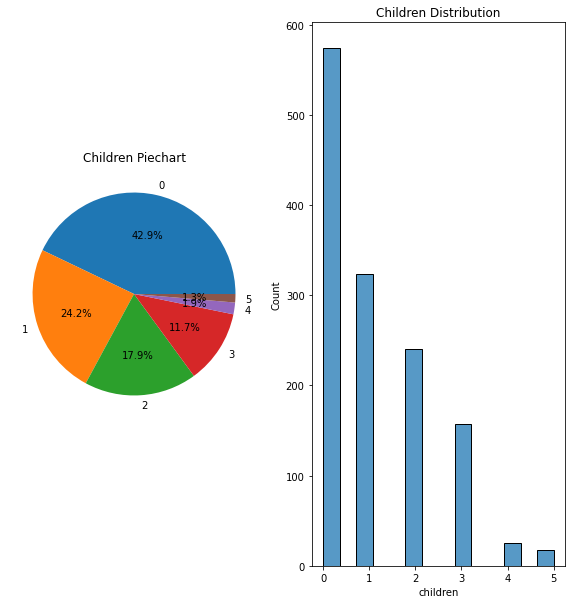

In [177]:
f = plt.figure(figsize=(10,10))

ax = f.add_subplot(121)
label_child = list(set(df['children']))
list_count_c = [df[df['children']==l]['children'].shape[0] for l in label_child]
plt.pie(list_count_c,labels=label_child,autopct='%1.1f%%')
ax.set_title('Children Piechart')

ax = f.add_subplot(122)
sns.histplot(df['children'])
ax.set_title('Children Distribution')

plt.show()

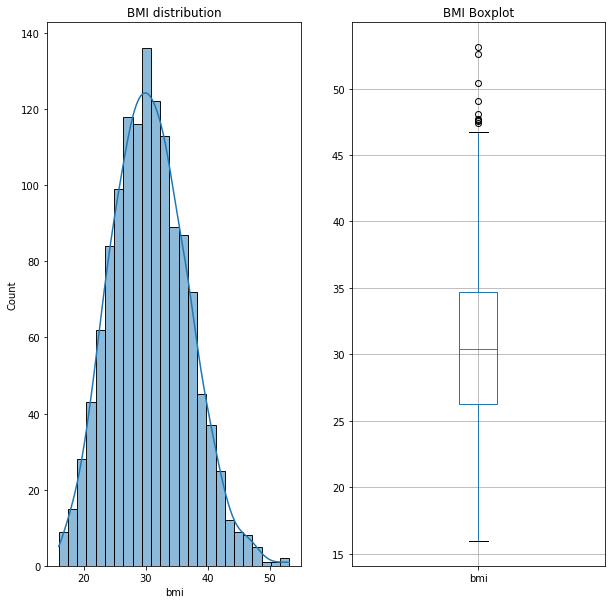

In [178]:
f = plt.figure(figsize=(10,10))

ax = f.add_subplot(121)
sns.histplot(df['bmi'],kde = True)
ax.set_title('BMI distribution')

ax = f.add_subplot(122)
bx = df.boxplot(column=['bmi'],grid = True)
ax.set_title('BMI Boxplot')

plt.show()

**Check for missing value**

In [179]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Plot the distribution of the dependent variable**

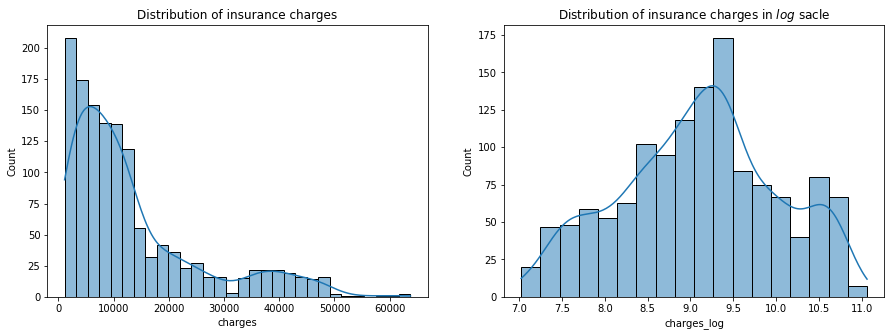

In [180]:
f= plt.figure(figsize=(15,5))
ax=f.add_subplot(121)

ax.set_title('Distribution of insurance charges')
sns.histplot(df['charges'],kde = True)

ax=f.add_subplot(122)
ax.set_title('Distribution of insurance charges in $log$ sacle')
df['charges_log']=df['charges'].apply(lambda x : log(x))
sns.histplot(df['charges_log'],kde = True)
df = df.drop(columns = ['charges_log'])



#Label Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

In [181]:
L_region = LabelEncoder()
L_region.fit(list(set(df['region'])))
df['region'] = L_region.transform(df['region'])

L_sex = LabelEncoder()
L_sex.fit(list(set(df['sex'])))
df['sex'] = L_sex.transform(df['sex'])

L_smoker = LabelEncoder()
L_smoker.fit(list(set(df['smoker'])))
df['smoker'] = L_smoker.transform(df['smoker'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Correlation Plot**

In [182]:
num = df.to_numpy()
corr_b = np.zeros((7,7))
for j in range(0,7):
  for k in range(0,7):
    corr_b[j][k] = pointbiserialr(num[:,j],num[:,k])[0]

corr_b = pd.DataFrame(corr_b,columns = df.columns,index=df.columns)

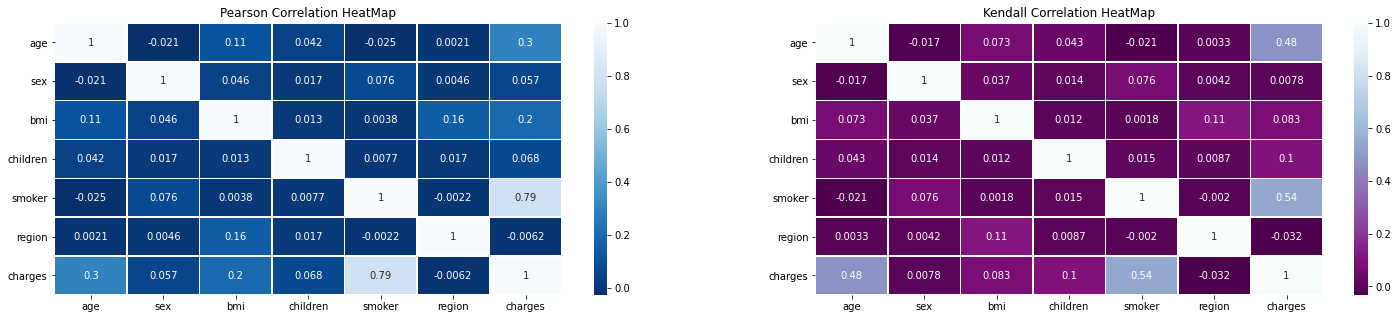

In [183]:
corr_p = df.corr(method ='pearson') 
corr_k = df.corr(method ='kendall')
corr_s = df.corr(method ='spearman')

f = plt.figure(figsize=(25,5))

ax = f.add_subplot(121)
ax.set_title('Pearson Correlation HeatMap')
sns.heatmap(corr_p,xticklabels=corr_p.columns,yticklabels=corr_p.columns,cmap='Blues_r',annot=True,linewidth=0.5)

ax = f.add_subplot(122)
ax.set_title('Kendall Correlation HeatMap')
sns.heatmap(corr_k,xticklabels=corr_k.columns,yticklabels=corr_k.columns,cmap='BuPu_r',annot=True,linewidth=0.5)

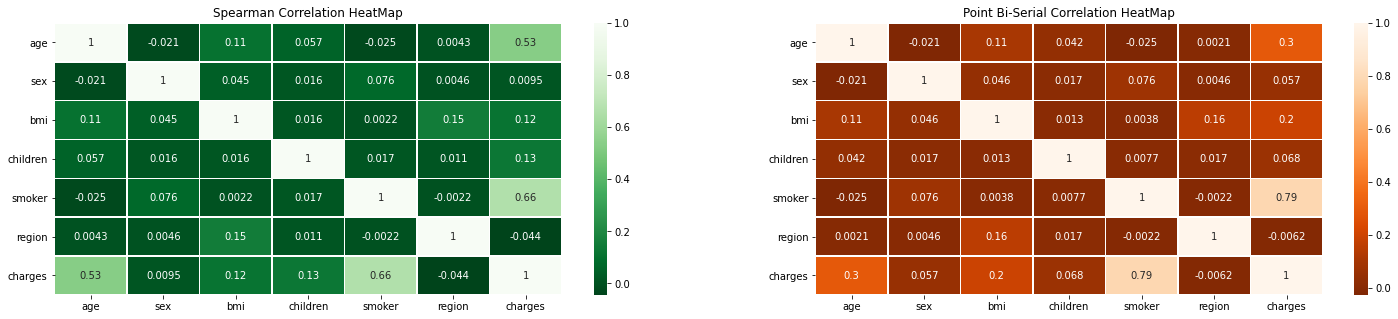

In [184]:
f = plt.figure(figsize=(25,5))

ax = f.add_subplot(121)
ax.set_title('Spearman Correlation HeatMap')
sns.heatmap(corr_s,xticklabels=corr_s.columns,yticklabels=corr_s.columns,cmap='Greens_r',annot=True,linewidth=0.5)

ax = f.add_subplot(122)
ax.set_title('Point Bi-Serial Correlation HeatMap')
sns.heatmap(corr_b,xticklabels=corr_b.columns,yticklabels=corr_b.columns,cmap='Oranges_r',annot=True,linewidth=0.5)

**Log transform of dependent variable**

In [185]:
df['charges_log']=df['charges'].apply(lambda x : log(x))

**Train Test split (without natural log in charges)**

In [186]:
xtro,xteo,ytro,yteo = train_test_split(df[['age','sex','bmi','children','smoker','region']],df['charges'],test_size = 0.3,shuffle = True)
xtrso,xteso,ytrso,yteso = train_test_split(df[['age','sex','bmi','children','smoker','region']],df['charges'],test_size = 0.3,shuffle = True)

**Train Test split (when natural log was taken in charges)**

In [187]:
xtr,xte,ytr,yte = train_test_split(df[['age','sex','bmi','children','smoker','region']],df[['charges_log']],test_size = 0.3,shuffle = True)
xtrs,xtes,ytrs,ytes = train_test_split(df[['age','sex','bmi','children','smoker','region']],df[['charges_log']],test_size = 0.3,shuffle = True)

#Model building

**Step 1: add x0 =1 to dataset**

In [188]:
xtr['constant'] = 1
xte['constant'] = 1

xtro['constant'] = 1
xteo['constant'] = 1

**Step2: build model**

In [189]:
xtr_arr = xtr.to_numpy()
xte_arr = xte.to_numpy()
ytr_arr = ytr.to_numpy()
yte_arr = yte.to_numpy()

xtr_arro = xtro.to_numpy()
xte_arro = xteo.to_numpy()
ytr_arro = ytro.to_numpy()
yte_arro = yteo.to_numpy()

In = np.dot((xtr_arr).T,xtr_arr)
Mun = np.dot((xtr_arr).T,ytr_arr)
Inn = np.linalg.inv(In)

Ino = np.dot((xtr_arro).T,xtr_arro)
Muno = np.dot((xtr_arro).T,ytr_arro)
Inno = np.linalg.inv(Ino)

Theta = np.dot(Inn,Mun)
Thetao = np.dot(Inno,Muno)

**The parameters for linear regression model**

In [190]:
weights_sc = pd.DataFrame(Theta,columns = ['Weights_log'],index=['age','sex','bmi','children','smoker','region','constant'])
weights_sc['Weights_original'] = Thetao
weights_sc

,Weights_log,Weights_original
age,0.034487,274.288995
sex,-0.083259,-272.997632
bmi,0.013198,361.857772
children,0.096467,498.453002
smoker,1.539780,23676.540913
region,-0.047934,-340.505802
constant,7.036637,-13250.525844


# Scikit Learn Model

**Modules**

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Parameter**

In [192]:
xtrs_arr = xtrs.to_numpy()
xtes_arr = xtes.to_numpy()
ytrs_arr = ytrs.to_numpy()
ytes_arr = ytes.to_numpy()

xtrs_arro = xtrso.to_numpy()
xtes_arro = xteso.to_numpy()
ytrs_arro = ytrso.to_numpy()
ytes_arro = yteso.to_numpy()

model = LinearRegression(n_jobs = -1)
model.fit(xtrs_arr,ytrs_arr)

modelo = LinearRegression(n_jobs = -1)
modelo.fit(xtrs_arro,ytrs_arro)

coeff_sk = list(model.coef_[0])
coeff_sk.append(list(model.intercept_)[0])

coeff_sko = list(modelo.coef_)
coeff_sko.append(modelo.intercept_)

weights_sk = pd.DataFrame(coeff_sk,columns = ['Weights'],index=['age','sex','bmi','children','smoker','region','constant'])
weights_sk['Weights_original'] = coeff_sko

weights_sk

,Weights,Weights_original
age,0.033610,254.124648
sex,-0.079802,-248.319163
bmi,0.012516,357.540192
children,0.112047,506.953512
smoker,1.561585,23959.912013
region,-0.047081,-512.007785
constant,7.080098,-12296.016885


#Model evaluation

**prediction**

In [193]:
y_pred = np.dot(xte_arr,Theta)
y_predo = np.dot(xte_arro,Thetao)

**Mean Squared Error (written from scratch)**

In [194]:
J_mse = np.sum((yte_arr - y_pred)**2)/yte_arr.shape[0]
print('The Mean Square Error(MSE) or J(theta), with natural log is: ',J_mse)

J_mseo = np.sum((yte_arro - y_predo)**2)/yte_arro.shape[0]
print('The Mean Square Error(MSE) or J(theta), without natural log is: ',J_mseo)

The Mean Square Error(MSE) or J(theta), with natural log is:  0.18830646855802602
The Mean Square Error(MSE) or J(theta), without natural log is:  33803464.35208089


# Sklearn Regression Model

**prediction**

In [195]:
y_pred_sk = model.predict(xtes_arr)
y_pred_sko = modelo.predict(xtes_arro)

**Evaluvation: MSE**

In [196]:
J_mse_sk = mean_squared_error(ytes_arr,y_pred_sk)
print('The Mean Square Error(MSE) or J(theta), wtih natural log is: ',J_mse_sk)

J_mse_sko = mean_squared_error(ytes_arro,y_pred_sko)
print('The Mean Square Error(MSE) or J(theta), without natural log is: ',J_mse_sko)

The Mean Square Error(MSE) or J(theta), wtih natural log is:  0.1999741097872681
The Mean Square Error(MSE) or J(theta), without natural log is:  36497803.516599864


# **Check for Linearity**

For Normal Equation, with and without taking natural log

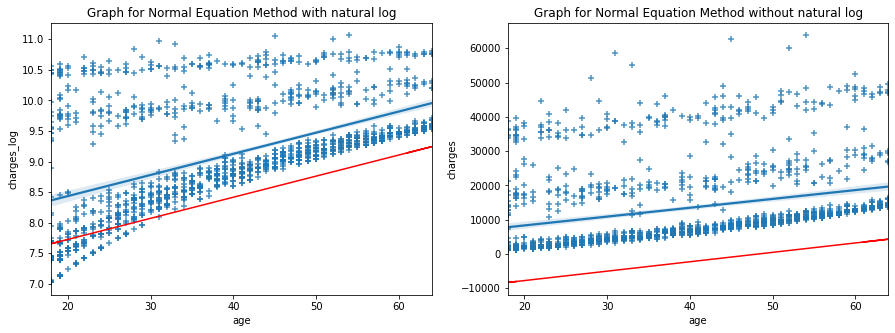

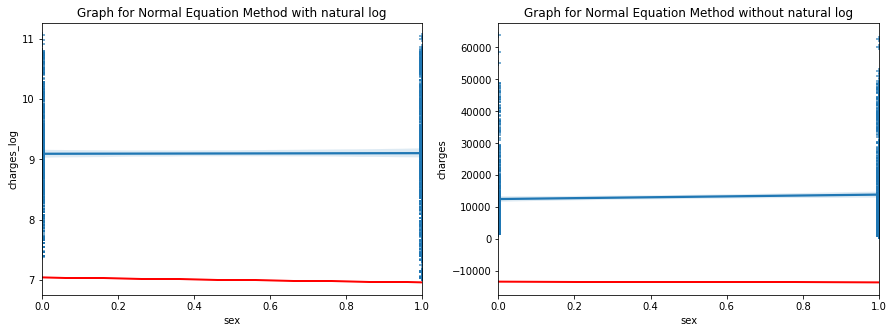

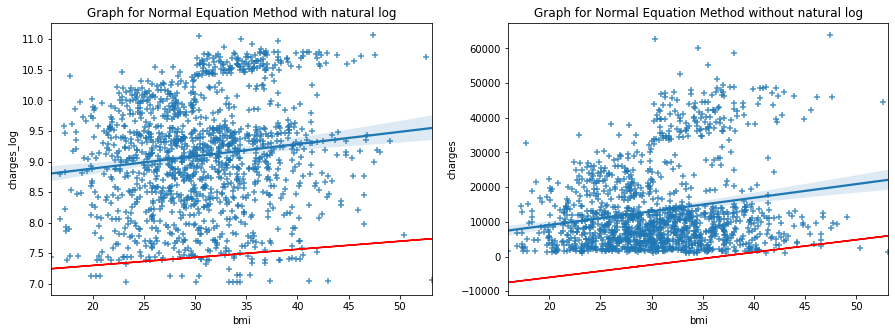

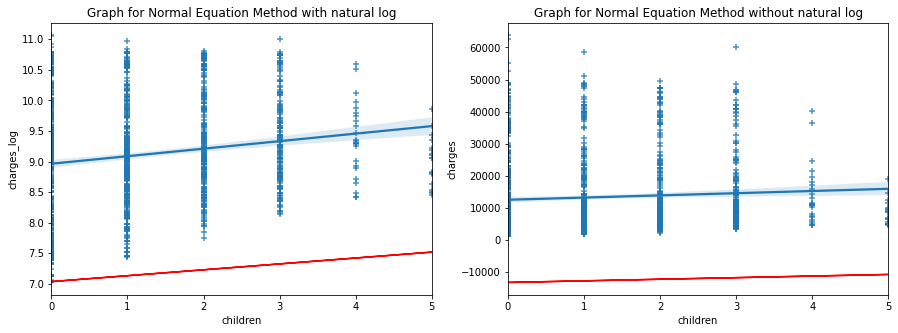

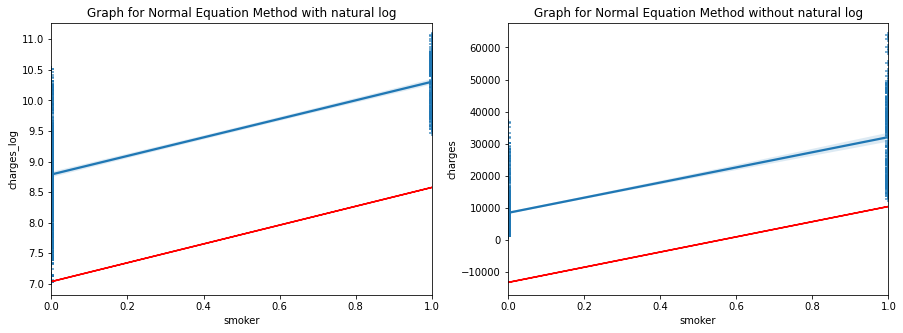

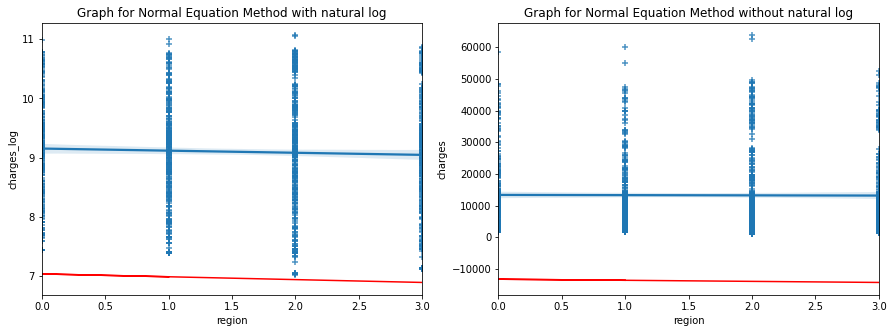

In [197]:
features = ['age','sex','bmi','children','smoker','region','constant']
xte['charges']=yte
xteo['charges']=yteo

for i in range(0,len(Theta)-1):
  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(121)
  ax.set_title('Graph for Normal Equation Method with natural log')
  sns.regplot(data=df,x=features[i],y='charges_log',marker="+")
  plt.plot(df[features[i]],(df[features[i]]*Theta[i])+Theta[-1],color = 'red')

  ax = f.add_subplot(122)
  ax.set_title('Graph for Normal Equation Method without natural log')
  sns.regplot(x=df[features[i]],y=df['charges'],marker="+")
  plt.plot(df[features[i]],(df[features[i]]*Thetao[i])+Thetao[-1],color = 'red')

For Sklearn Implementation, with and without natural log

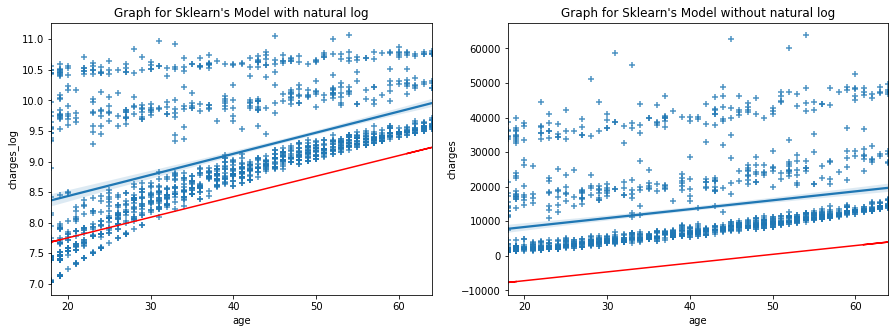

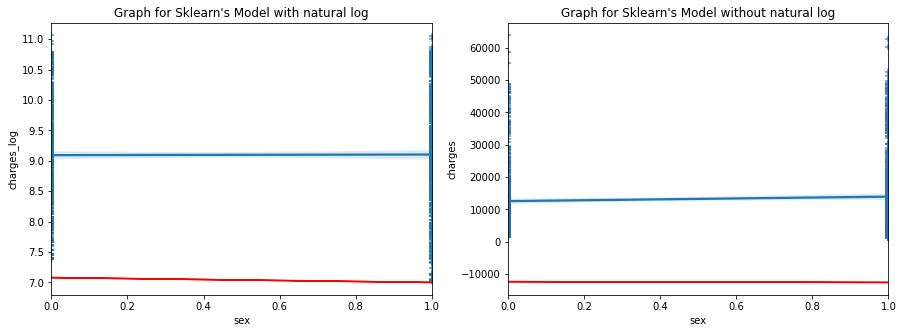

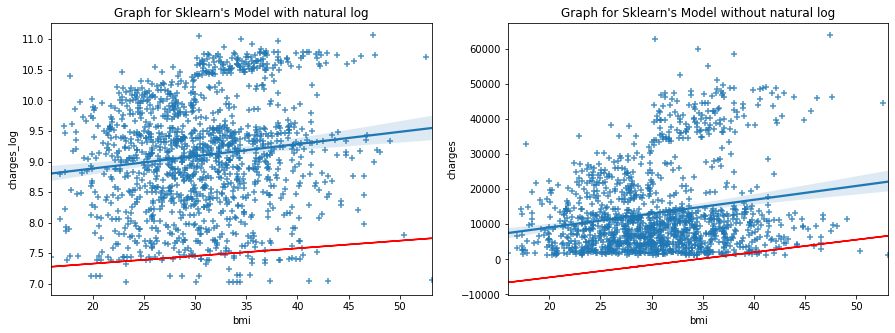

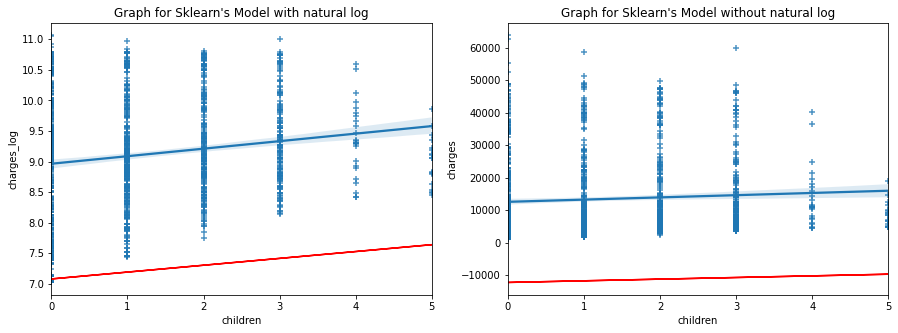

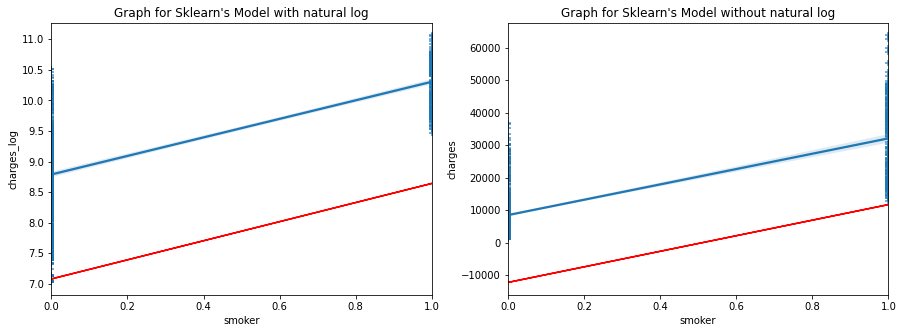

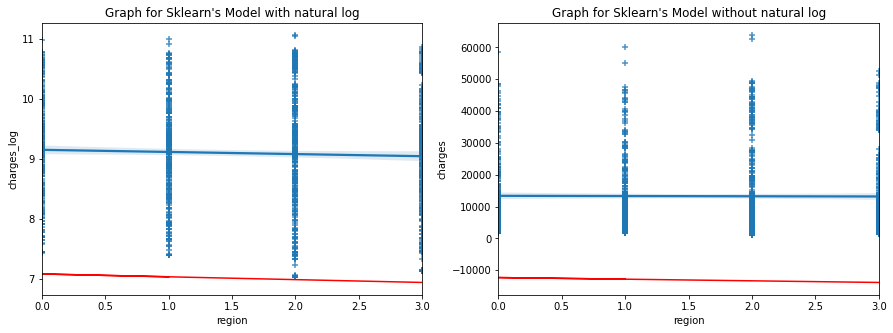

In [198]:
for ii in range(0,len(Theta)-1):
  f = plt.figure(figsize=(15,5))
  ax = f.add_subplot(121)
  ax.set_title("Graph for Sklearn's Model with natural log")
  sns.regplot(data=df,x=features[ii],y='charges_log',marker="+")
  plt.plot(df[features[ii]],(df[features[ii]]*coeff_sk[ii])+coeff_sk[-1],color = 'red')

  ax = f.add_subplot(122)
  ax.set_title("Graph for Sklearn's Model without natural log")
  sns.regplot(x=df[features[ii]],y=df['charges'],marker="+")
  plt.plot(df[features[ii]],(df[features[ii]]*coeff_sko[ii])+coeff_sko[-1],color = 'red')